<a href="https://colab.research.google.com/github/szh141/colab/blob/main/robust_watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/the-modern-scientist/robust-watershed-transform-enhancing-image-segmentation-in-the-digital-era-79ae112626b1


In [28]:
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import filters, morphology, measure,feature

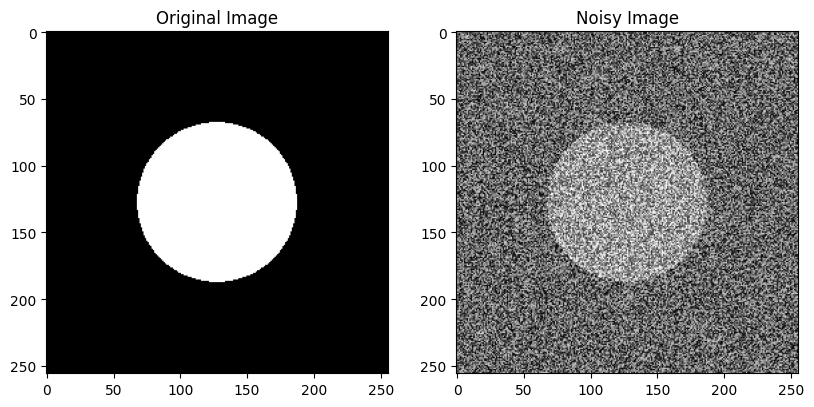

In [23]:

# Step 1: Generate a synthetic image
image_size = 256
image = np.zeros((image_size, image_size), dtype=np.uint8)
center = image_size//2

x = np.linspace(0, image_size, image_size)
y = np.linspace(0, image_size, image_size)
xx, yy = np.meshgrid(x, y)

dist = np.sqrt((xx-center)**2 + (yy-center)**2)
image[dist < 60] = 1

#add noise
noise = np.random.randint(0, 256, (image_size, image_size), dtype=np.uint8)
noisy_image = image + 0.015*noise

"""
# Step 2: Apply Robust Watershed Transform
# Preprocessing: Noise reduction
smoothed = filters.gaussian(noisy_image,sigma =1)


# Finding sure foreground area using Otsu's threshold
ret, sure_fg = cv2.threshold(smoothed, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Finding sure background area
sure_bg = cv2.dilate(sure_fg, np.ones((3,3), np.uint8), iterations=3)

# Finding unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(cv2.cvtColor(noisy_image, cv2.COLOR_GRAY2BGR), markers)
segmented = markers.copy()
"""

# Step 3: Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
#plt.subplot(1, 3, 3), plt.imshow(segmented, cmap='jet'), plt.title('Segmented Image')
plt.show()

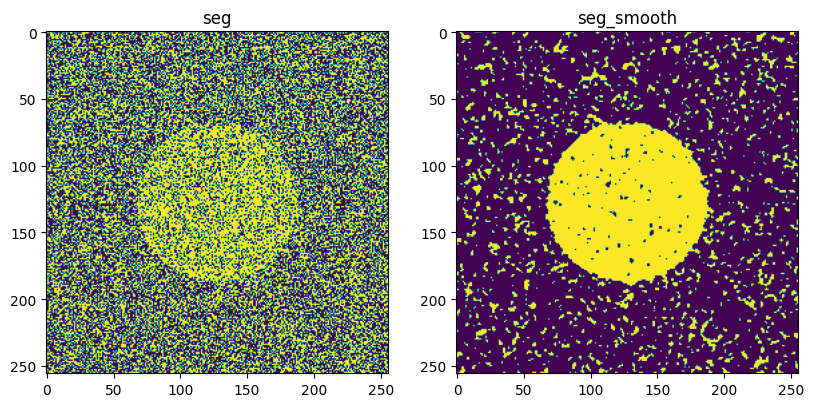

In [27]:
# smoothing takes care of a lot of noise already

seg = noisy_image>filters.threshold_otsu(noisy_image)
smoothed = filters.gaussian(noisy_image,sigma =1)
seg_smooth = smoothed>filters.threshold_otsu(smoothed)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(seg), plt.title('seg')
plt.subplot(1, 3, 2), plt.imshow(seg_smooth), plt.title('seg_smooth')
plt.show()

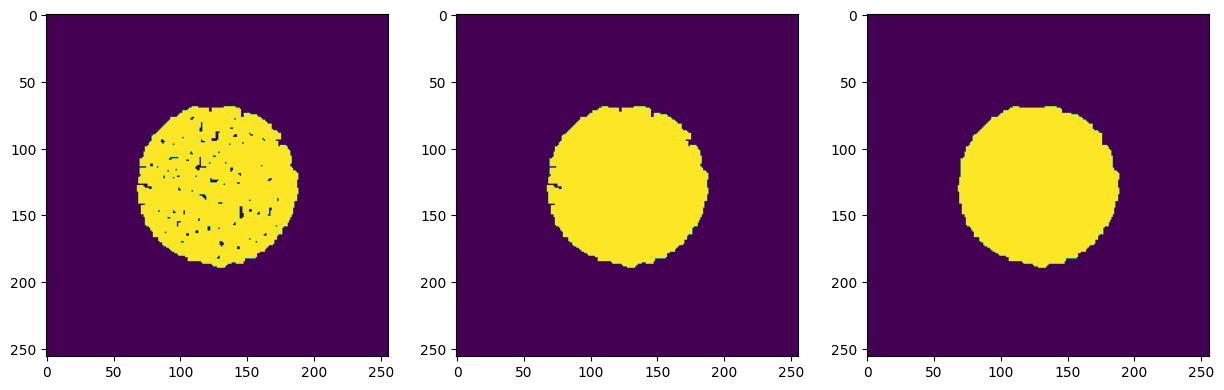

In [45]:
# no need to use watershed if there's no touching objects
# morphological operation is good enough

sure_fg = morphology.binary_opening(seg_smooth,np.ones((5,5)))
sure_fg3 = morphology.binary_closing(sure_fg,np.ones((5,5)))
sure_fg2 = morphology.remove_small_holes(sure_fg,30)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(sure_fg)
plt.subplot(1, 3, 2), plt.imshow(sure_fg2)
plt.subplot(1, 3, 3), plt.imshow(sure_fg3)
plt.show()

cv2 marker for watershed is

0 for unknown

1 for background

2 or others for foreground

skimage, nuclear separation example

mask out the noisy area first, then watershed the masked area
the seed is the scipy.ndi, distance transformation

there's only seed and unknown, not sure_bg, sure_fg, and unknown.

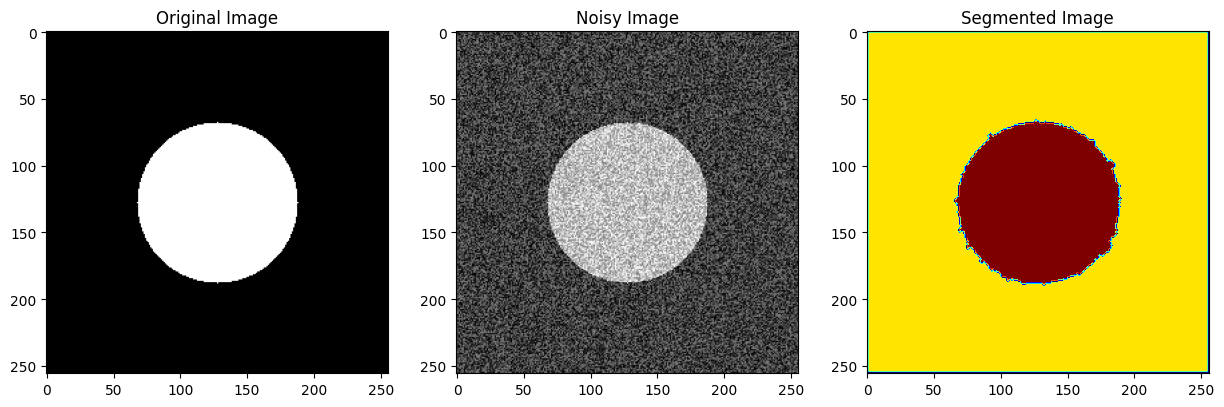

In [50]:
# code from the post

import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic image
image_size = 256
image = np.zeros((image_size, image_size), dtype=np.uint8)
cv2.circle(image, (image_size // 2, image_size // 2), 60, 255, -1)
noise = np.random.randint(0, 256, (image_size, image_size), dtype=np.uint8)
noisy_image = cv2.addWeighted(image, 0.5, noise, 0.5, 0)

# Step 2: Apply Robust Watershed Transform
# Preprocessing: Noise reduction
smoothed = cv2.GaussianBlur(noisy_image, (9, 9), 0)

# Finding sure foreground area using Otsu's threshold
ret, sure_fg = cv2.threshold(smoothed, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Finding sure background area
sure_bg = cv2.dilate(sure_fg, np.ones((3,3), np.uint8), iterations=3)

# Finding unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(cv2.cvtColor(noisy_image, cv2.COLOR_GRAY2BGR), markers)
segmented = markers.copy()

# Step 3: Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(1, 3, 3), plt.imshow(segmented, cmap='jet'), plt.title('Segmented Image')
plt.show()